<a href="https://colab.research.google.com/github/icedumpy/BotnoiCV/blob/main/Project-1/Cat_VS_Dog_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install botnoi library

In [1]:
!pip install botnoi==0.2.1

# Import libraries

In [2]:
import botnoi as bn
import numpy as np
from botnoi import cv
import tensorflow as tf
from tensorflow import keras
from botnoi import scrape as sc
import matplotlib.pyplot as plt
from tensorflow.image import resize

# Define functions

In [3]:
def predict_image_from_url(model, url):
    img = cv.image(url)
    img = np.asarray(img.getimage())
    img = resize(np.asarray(img), (128, 128)).numpy().astype("float32")
    img = np.expand_dims(img, axis=0)
    pred = (model.predict(img) >= 0.5).astype(int)[0][0]
    return img[0], pred

# Load model

In [4]:
model = keras.models.load_model("model.h5")

# Get image urls

In [5]:
list_cat_image = sc.get_image_urls('animal cat', 10)
list_dog_image = sc.get_image_urls('animal dog', 10)

list_cat_image = np.random.choice(list_cat_image, 20, replace=False)
list_dog_image = np.random.choice(list_dog_image, 20, replace=False)

complete: 0.00%
completed
complete: 0.00%
completed


# Predict (0: Cat, 1: Dog)

In [6]:
dict_class = {0: "Cat",
                   1: "Dog"}

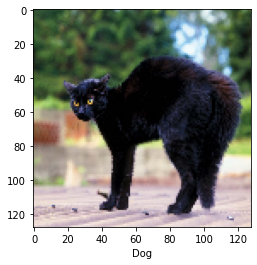

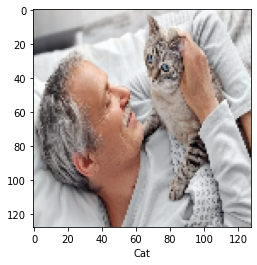

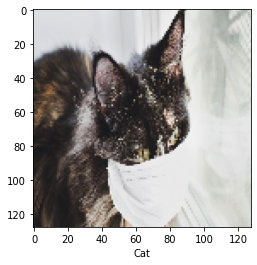

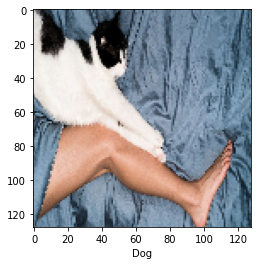

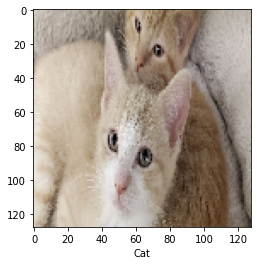

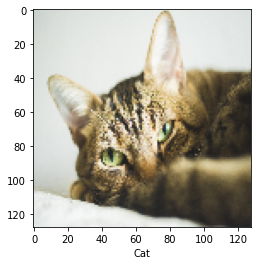

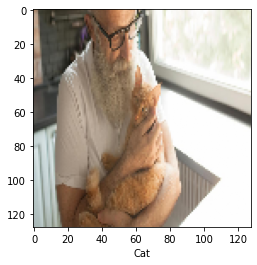

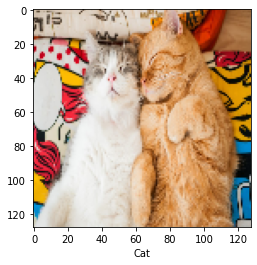

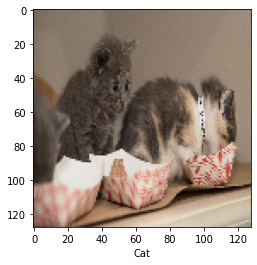

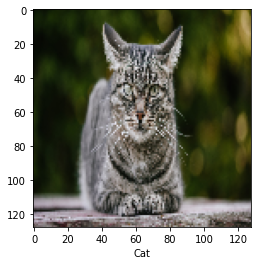

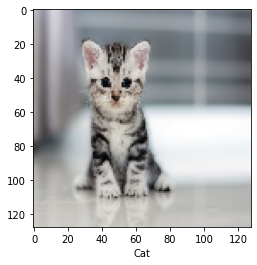

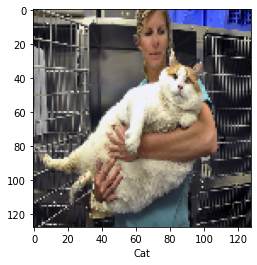

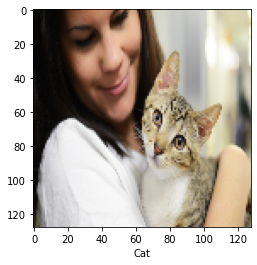

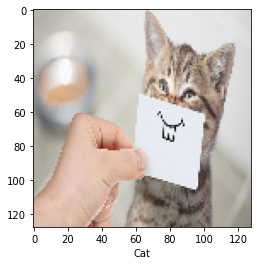

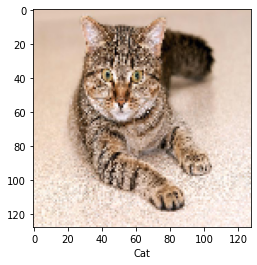

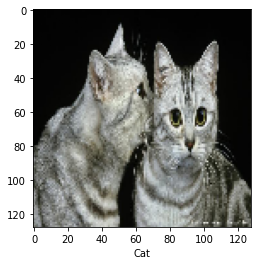

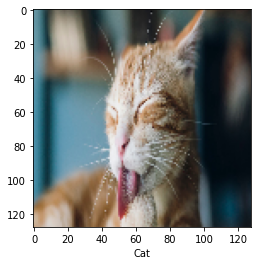

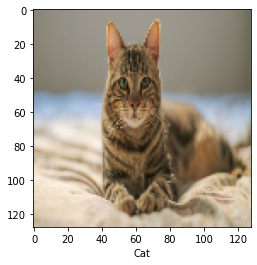

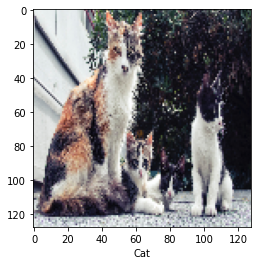

In [7]:
plt.close("all")
for url in list_cat_image:
    try:
        img, pred = predict_image_from_url(model, url)
        plt.figure()
        plt.imshow(img/255.0)
        plt.xlabel(dict_class[pred])
    except:
        continue

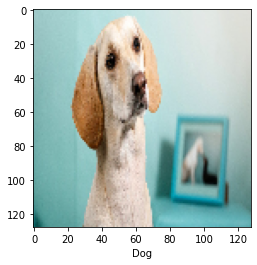

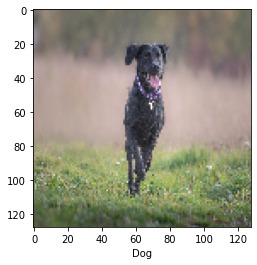

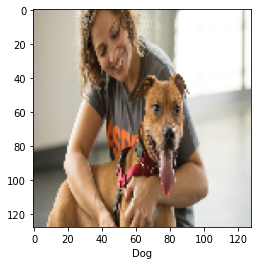

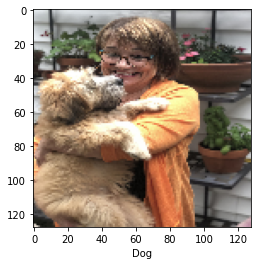

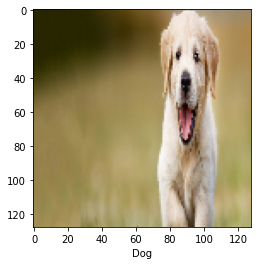

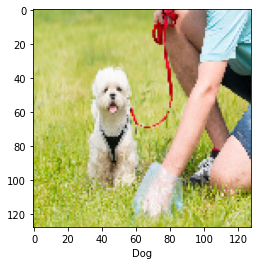

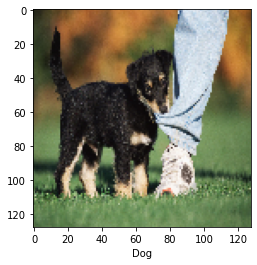

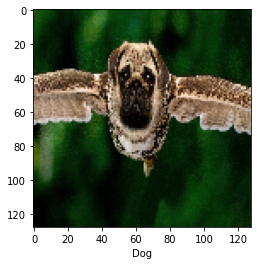

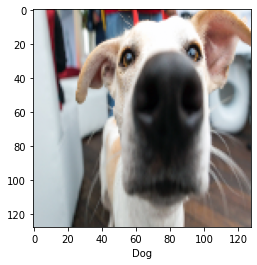

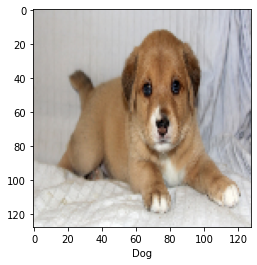

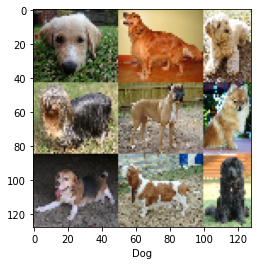

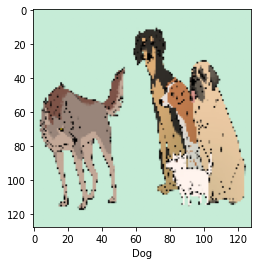

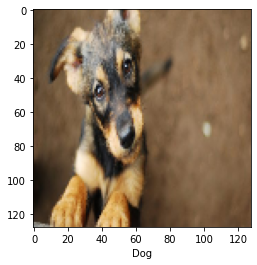

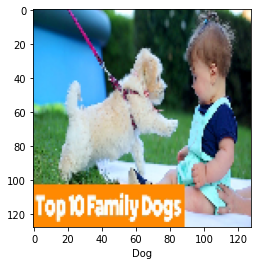

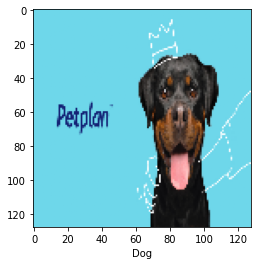

In [8]:
plt.close("all")
for url in list_dog_image:
    try:
        img, pred = predict_image_from_url(model, url)
        plt.figure()
        plt.imshow(img/255.0)
        plt.xlabel(dict_class[pred])
    except:
        continue

Text(0.5, 0, 'Dog')

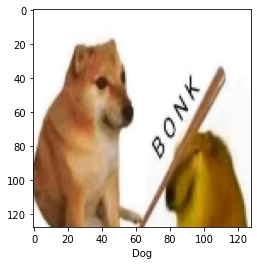

In [9]:
url = "https://steamuserimages-a.akamaihd.net/ugc/1618439156949856647/EBFE6D18C67B0599FFA3F25DA20F020E6C9854C8/?imw=637&imh=358&ima=fit&impolicy=Letterbox&imcolor=%23000000&letterbox=true"
# url = "https://img.freepik.com/free-photo/pomeranian-dog-sitting-white_127207-25.jpg?size=626&ext=jpg"
img, pred  = predict_image_from_url(model, url)
plt.figure()
plt.imshow(img/255.0)
plt.xlabel(dict_class[pred])